# Analysis 2

## Plot 1: Number students in each major between the age group 25-28


In [26]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [27]:
df1=pd.read_csv("C:\\Users\\Raksha\\Desktop\\Spring 2017\\DATA Analysis\\Final\\College Majors\\grad-students.csv")
df1.head()

,Major_code,Major,Major_category,Grad_total,Grad_sample_size,Grad_employed,Grad_full_time_year_round,Grad_unemployed,Grad_unemployment_rate,Grad_median,...,Nongrad_total,Nongrad_employed,Nongrad_full_time_year_round,Nongrad_unemployed,Nongrad_unemployment_rate,Nongrad_median,Nongrad_P25,Nongrad_P75,Grad_share,Grad_premium
0,5601,CONSTRUCTION SERVICES,Industrial Arts & Consumer Services,9173,200,7098,6511,681,0.087543,75000.0,...,86062,73607,62435,3928,0.050661,65000.0,47000,98000.0,0.096320,0.153846
1,6004,COMMERCIAL ART AND GRAPHIC DESIGN,Arts,53864,882,40492,29553,2482,0.057756,60000.0,...,461977,347166,250596,25484,0.068386,48000.0,34000,71000.0,0.104420,0.250000
2,6211,HOSPITALITY MANAGEMENT,Business,24417,437,18368,14784,1465,0.073867,65000.0,...,179335,145597,113579,7409,0.048423,50000.0,35000,75000.0,0.119837,0.300000
3,2201,COSMETOLOGY SERVICES AND CULINARY ARTS,Industrial Arts & Consumer Services,5411,72,3590,2701,316,0.080901,47000.0,...,37575,29738,23249,1661,0.052900,41600.0,29000,60000.0,0.125878,0.129808
4,2001,COMMUNICATION TECHNOLOGIES,Computers & Mathematics,9109,171,7512,5622,466,0.058411,57000.0,...,53819,43163,34231,3389,0.072800,52000.0,36000,78000.0,0.144753,0.096154


In [28]:
df2=pd.read_csv("C:\\Users\\Raksha\\Desktop\\Spring 2017\\DATA Analysis\\Final\\College Majors\\recent-grads.csv")
df2.head()

,Rank,Major_code,Major,Major_category,Total,Sample_size,Men,Women,ShareWomen,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,Engineering,2339,36,2057,282,0.120564,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,Engineering,756,7,679,77,0.101852,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,Engineering,856,3,725,131,0.153037,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,1258,16,1123,135,0.107313,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,Engineering,32260,289,21239,11021,0.341631,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [29]:
major=list(df1.groupby(by=['Major_category'])['Major_category'].unique())

In [30]:
grad_total_twentyfiveplus=list(df1.groupby(by=['Major_category'])['Grad_total'].sum())

In [31]:
grad_total_twentyeightminus=list(df2.groupby(by=['Major_category'])['Total'].sum())

In [32]:
#calculate total grads in the age group 25-28
grad_totalTwentyFiveToTwentyEight=[0]*16
for i in range(0,len(grad_total_twentyeightminus)):
    grad_totalTwentyFiveToTwentyEight[i]=abs(grad_total_twentyeightminus[i]-grad_total_twentyfiveplus[i])


In [33]:
df3=pd.DataFrame({'25-28':grad_totalTwentyFiveToTwentyEight,'Major_category':major})
df3=df3.set_index('Major_category')
df3

,25-28
Major_category,
[Agriculture & Natural Resources],161361
[Arts],223286
[Biology & Life Science],1202694
[Business],1416521
[Communications & Journalism],70279
[Computers & Mathematics],620809
[Education],3386171
[Engineering],1594941
[Health],1005107


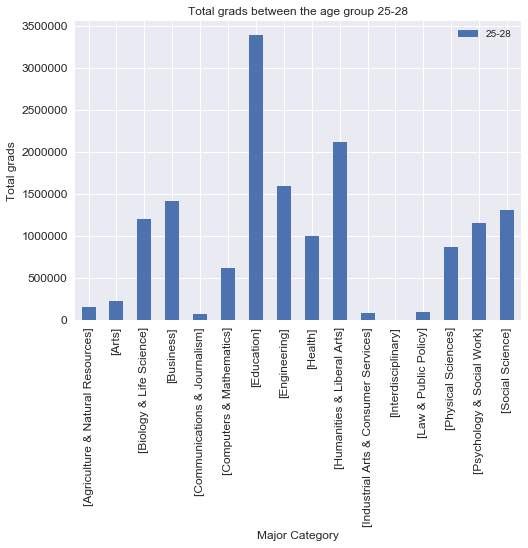

In [34]:
plt.close('all')
ax = df3[['25-28']].plot(kind='bar', title ="Total grads between the age group 25-28", legend=True, fontsize=12)
ax.set_xlabel("Major Category", fontsize=12)
ax.set_ylabel("Total grads", fontsize=12)
fig = ax.get_figure()
fig.savefig("GradsBetween25-28")
plt.show()